In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('flights.csv', dtype=str)
df.head(20)

In [4]:
df_airports = pd.read_csv('airports.csv')
df_airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [5]:
df_airlines = pd.read_csv('airlines.csv')
df_airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [6]:
df[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1)

0          False
1          False
2          False
3          False
4          False
           ...  
5819074    False
5819075    False
5819076    False
5819077    False
5819078    False
Length: 5819079, dtype: bool

In [26]:
df = df.loc[~df[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1)]
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,...,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,...,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,...,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,...,0259,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,0753,-26,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,0430,-16,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,0432,-8,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,0330,-10,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df = df.dropna(subset=["ARRIVAL_DELAY"])
df_delay = df.loc[df['ARRIVAL_DELAY'].astype(int) > 0]
df_delay[["DEPARTURE_DELAY", 'ARRIVAL_DELAY']].astype(int).corr()


,DEPARTURE_DELAY,ARRIVAL_DELAY
DEPARTURE_DELAY,1.000000,0.960092
ARRIVAL_DELAY,0.960092,1.000000


Время задержки прилета и вылета сильно коррелируют, значит можно рассмотреть только одну из них

In [10]:
df_delay.head(30)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,0025,...,0610,8,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14,2015,1,1,4,DL,2440,N651DL,SEA,MSP,0040,...,0557,8,0,0,NaN,NaN,NaN,NaN,NaN,NaN
20,2015,1,1,4,NK,520,N525NK,LAS,MCI,0055,...,0543,6,0,0,NaN,NaN,NaN,NaN,NaN,NaN
21,2015,1,1,4,AA,371,N3GXAA,SEA,MIA,0100,...,0939,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
27,2015,1,1,4,NK,597,N528NK,MSP,FLL,0115,...,0607,25,0,0,NaN,25,0,0,0,0
29,2015,1,1,4,AA,2392,N3HRAA,DEN,MIA,0120,...,0709,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN
30,2015,1,1,4,NK,168,N629NK,PHX,ORD,0125,...,0632,43,0,0,NaN,43,0,0,0,0
33,2015,1,1,4,DL,95,N320US,SLC,ATL,0140,...,0725,10,0,0,NaN,NaN,NaN,NaN,NaN,NaN
35,2015,1,1,4,HA,17,N389HA,LAS,HNL,0145,...,0610,15,0,0,NaN,0,0,15,0,0


In [20]:
df_delay_small = df.loc[(df['ARRIVAL_DELAY'].astype(int) < 15) & (df['ARRIVAL_DELAY'].astype(int) > 0)]
df_delay_small.head(15)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,0025,...,0610,8,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14,2015,1,1,4,DL,2440,N651DL,SEA,MSP,0040,...,0557,8,0,0,NaN,NaN,NaN,NaN,NaN,NaN
20,2015,1,1,4,NK,520,N525NK,LAS,MCI,0055,...,0543,6,0,0,NaN,NaN,NaN,NaN,NaN,NaN
21,2015,1,1,4,AA,371,N3GXAA,SEA,MIA,0100,...,0939,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
29,2015,1,1,4,AA,2392,N3HRAA,DEN,MIA,0120,...,0709,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN
33,2015,1,1,4,DL,95,N320US,SLC,ATL,0140,...,0725,10,0,0,NaN,NaN,NaN,NaN,NaN,NaN
39,2015,1,1,4,B6,304,N607JB,SJU,JFK,0155,...,0501,11,0,0,NaN,NaN,NaN,NaN,NaN,NaN
41,2015,1,1,4,NK,972,N606NK,PHX,DFW,0159,...,0503,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
45,2015,1,1,4,B6,1990,N597JB,SJU,EWR,0206,...,0516,4,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_delay_big = df.loc[df['ARRIVAL_DELAY'].astype(int) >= 15]
df_delay_big.head(15)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
27,2015,1,1,4,NK,597,N528NK,MSP,FLL,0115,...,0607,25,0,0,NaN,25,0,0,0,0
30,2015,1,1,4,NK,168,N629NK,PHX,ORD,0125,...,0632,43,0,0,NaN,43,0,0,0,0
35,2015,1,1,4,HA,17,N389HA,LAS,HNL,0145,...,0610,15,0,0,NaN,0,0,15,0,0
50,2015,1,1,4,B6,1030,N239JB,BQN,MCO,0307,...,0520,20,0,0,NaN,20,0,0,0,0
52,2015,1,1,4,B6,2134,N307JB,SJU,MCO,0400,...,0730,85,0,0,NaN,0,0,85,0,0
55,2015,1,1,4,B6,2276,N646JB,SJU,BDL,0438,...,0908,89,0,0,NaN,17,0,72,0,0
70,2015,1,1,4,AA,1057,N3ASAA,DFW,MIA,0515,...,1038,102,0,0,NaN,0,0,0,0,102
73,2015,1,1,4,US,425,N174US,PDX,PHX,0520,...,0950,60,0,0,NaN,0,0,60,0,0
74,2015,1,1,4,AA,89,N3KVAA,IAH,MIA,0520,...,0935,54,0,0,NaN,0,0,54,0,0
86,2015,1,1,4,AA,328,N4XKAA,DEN,DFW,0530,...,0941,66,0,0,NaN,13,0,53,0,0


Видно, что причины опазданий есть только в случаях, когда опоздание не меньше чем на 15 минут. 

In [21]:
print("Все задержки")
print(df_delay[["DAY_OF_WEEK", 'ARRIVAL_DELAY']].astype(int).groupby(by="DAY_OF_WEEK").agg(['mean']))
print("Короткие задержки")
print(df_delay_small[["DAY_OF_WEEK", 'ARRIVAL_DELAY']].astype(int).groupby(by="DAY_OF_WEEK").agg(['mean']))
print("Долгие задержки")
print(df_delay_big [["DAY_OF_WEEK", 'ARRIVAL_DELAY']].astype(int).groupby(by="DAY_OF_WEEK").agg(['mean']))


Все задержки
            ARRIVAL_DELAY
                     mean
DAY_OF_WEEK              
1               36.087933
2               33.807593
3               31.911584
4               32.725986
5               31.435189
6               32.083382
7               33.576126
Короткие задержки
            ARRIVAL_DELAY
                     mean
DAY_OF_WEEK              
1                6.284698
2                6.289830
3                6.285297
4                6.357556
5                6.339850
6                6.221227
7                6.319867
Долгие задержки
            ARRIVAL_DELAY
                     mean
DAY_OF_WEEK              
1               62.744608
2               60.015749
3               57.050884
4               57.892808
5               56.459438
6               58.894312
7               59.334699


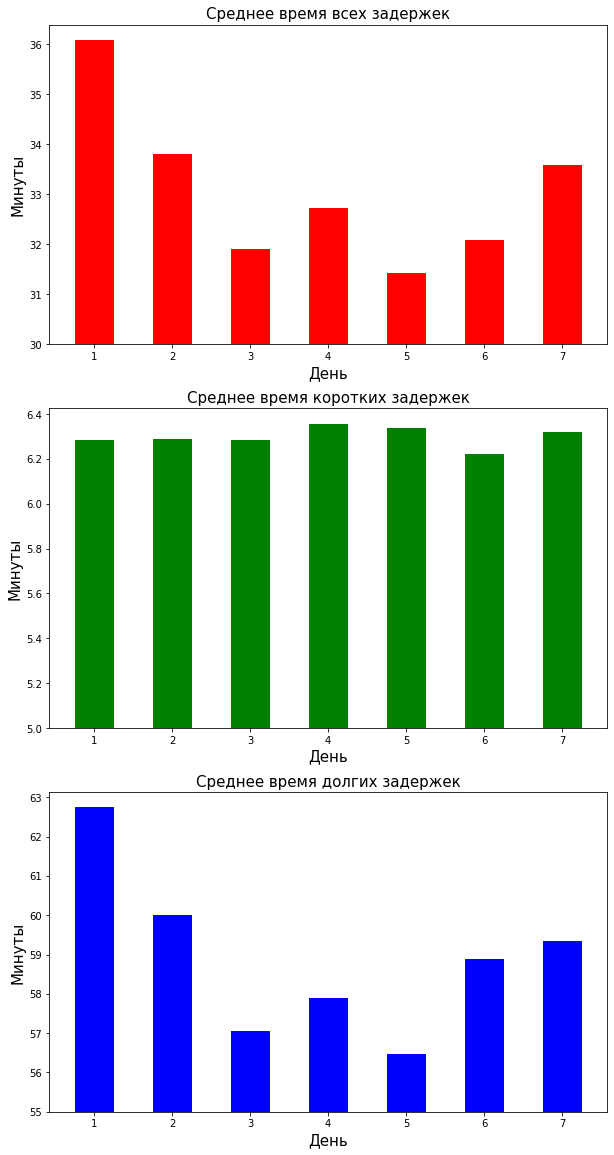

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 20))
width = 0.5 
ax1.bar(range(1,8), df_delay[["DAY_OF_WEEK", 'ARRIVAL_DELAY']].astype(int).groupby(by="DAY_OF_WEEK").agg(['mean']).ARRIVAL_DELAY['mean']-30, width, color='r', bottom = 30)


ax1.set_ylabel('Минуты', fontsize=15)
ax1.set_xlabel('День', fontsize=15)
ax1.set_title('Среднее время всех задержек', fontsize=15)
ax2.bar(range(1,8), df_delay_small[["DAY_OF_WEEK", 'ARRIVAL_DELAY']].astype(int).groupby(by="DAY_OF_WEEK").agg(['mean']).ARRIVAL_DELAY['mean']-5, width, color='green', bottom = 5)


ax2.set_ylabel('Минуты', fontsize=15)
ax2.set_xlabel('День', fontsize=15)
ax2.set_title('Среднее время коротких задержек', fontsize=15)

ax3.bar(range(1,8), df_delay_big[["DAY_OF_WEEK", 'ARRIVAL_DELAY']].astype(int).groupby(by="DAY_OF_WEEK").agg(['mean']).ARRIVAL_DELAY['mean']-55, width, color='b', bottom = 55)


ax3.set_ylabel('Минуты', fontsize=15)
ax3.set_xlabel('День', fontsize=15)
ax3.set_title('Среднее время долгих задержек', fontsize=15)


plt.show()

In [32]:
df_delay[['DAY_OF_WEEK', 'ARRIVAL_DELAY']].astype(int).corr()

,DAY_OF_WEEK,ARRIVAL_DELAY
DAY_OF_WEEK,1.000000,-0.015939
ARRIVAL_DELAY,-0.015939,1.000000


In [33]:
df_delay_big[['DAY_OF_WEEK', 'ARRIVAL_DELAY']].astype(int).corr()

,DAY_OF_WEEK,ARRIVAL_DELAY
DAY_OF_WEEK,1.000000,-0.016103
ARRIVAL_DELAY,-0.016103,1.000000


In [34]:
df_delay_small[['DAY_OF_WEEK', 'ARRIVAL_DELAY']].astype(int).corr()

,DAY_OF_WEEK,ARRIVAL_DELAY
DAY_OF_WEEK,1.000000,0.001141
ARRIVAL_DELAY,0.001141,1.000000


Видно, что среднее время долгих звдержет в понедельник значительно выше, чем в остальные дни, а для коротких задержек день недели важен сильно меньше (значение коэф. корреляции меньше на порядок)


Можно предположить, что в зимнее время из-за частых снегопадов и учащенной плохой погоды задержки больше, или летом (в период отпусков)

In [37]:
print("Все задержки")
print(df_delay[["MONTH", 'ARRIVAL_DELAY']].astype(int).groupby(by="MONTH").agg(['mean']))
print("Короткие задержки")
print(df_delay_small[["MONTH", 'ARRIVAL_DELAY']].astype(int).groupby(by="MONTH").agg(['mean']))
print("Долгие задержки")
print(df_delay_big [["MONTH", 'ARRIVAL_DELAY']].astype(int).groupby(by="MONTH").agg(['mean']))


Все задержки
      ARRIVAL_DELAY
               mean
MONTH              
1         32.755759
2         35.084894
3         31.764549
4         30.157083
5         34.111806
6         38.423327
7         34.889674
8         34.050207
9         28.015738
10        26.959795
11        30.351220
12        36.718654
Короткие задержки
      ARRIVAL_DELAY
               mean
MONTH              
1          6.402609
2          6.476166
3          6.343184
4          6.277360
5          6.293232
6          6.382522
7          6.315094
8          6.256252
9          6.086996
10         6.071639
11         6.275701
12         6.422258
Долгие задержки
      ARRIVAL_DELAY
               mean
MONTH              
1         56.694167
2         59.210498
3         56.980577
4         56.163848
5         60.654348
6         63.683192
7         59.339236
8         59.677951
9         54.804066
10        55.181178
11        57.257287
12        62.616418


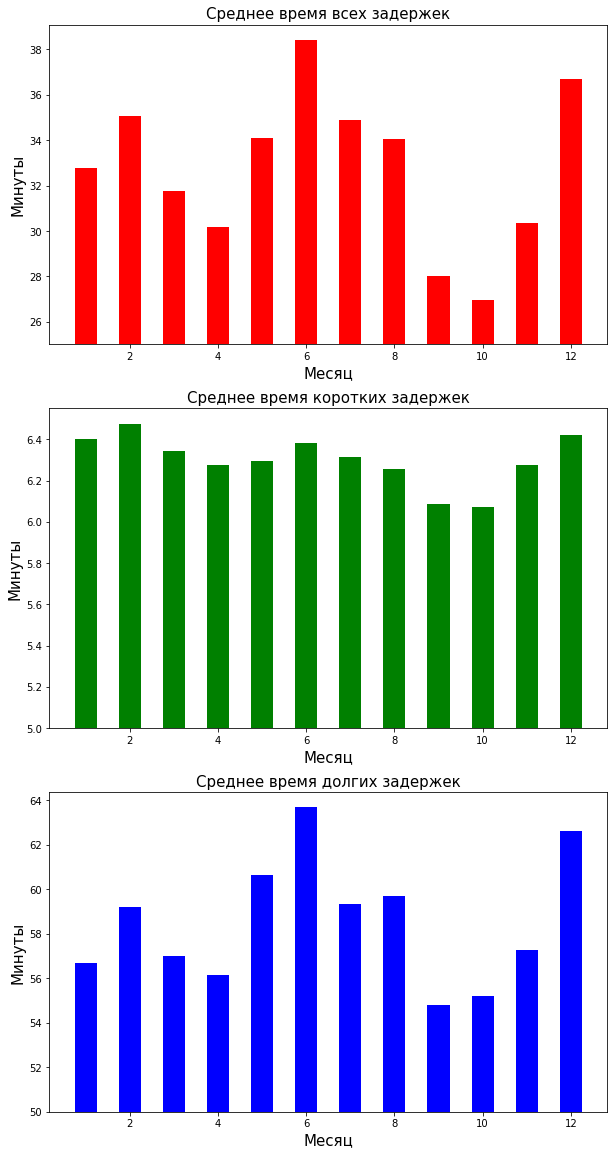

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 20))
width = 0.5 
ax1.bar(range(1,13), df_delay[["MONTH", 'ARRIVAL_DELAY']].astype(int).groupby(by="MONTH").agg(['mean']).ARRIVAL_DELAY['mean']-25, width, color='r', bottom = 25)


ax1.set_ylabel('Минуты', fontsize=15)
ax1.set_xlabel('Месяц', fontsize=15)
ax1.set_title('Среднее время всех задержек', fontsize=15)
ax2.bar(range(1,13), df_delay_small[["MONTH", 'ARRIVAL_DELAY']].astype(int).groupby(by="MONTH").agg(['mean']).ARRIVAL_DELAY['mean']-5, width, color='green', bottom = 5)


ax2.set_ylabel('Минуты', fontsize=15)
ax2.set_xlabel('Месяц', fontsize=15)
ax2.set_title('Среднее время коротких задержек', fontsize=15)

ax3.bar(range(1,13), df_delay_big[["MONTH", 'ARRIVAL_DELAY']].astype(int).groupby(by="MONTH").agg(['mean']).ARRIVAL_DELAY['mean']-50, width, color='b', bottom = 50)


ax3.set_ylabel('Минуты', fontsize=15)
ax3.set_xlabel('Месяц', fontsize=15)
ax3.set_title('Среднее время долгих задержек', fontsize=15)


plt.show()

Видно, что самые большие задержки происходят в декабре (местное рождество), июне (период отпусков), так же большие значения с мая по август (тоже период отпусков и каникулы в школах)

In [46]:
df_delay['SCHEDULED_DEPARTURE_HOUR'] = df_delay['SCHEDULED_DEPARTURE'].astype(int)//100
df_delay_small['SCHEDULED_DEPARTURE_HOUR'] = df_delay_small['SCHEDULED_DEPARTURE'].astype(int)//100
df_delay_big['SCHEDULED_DEPARTURE_HOUR'] = df_delay_big['SCHEDULED_DEPARTURE'].astype(int)//100

C:\Users\andri\AppData\Local\Temp\ipykernel_3756\1605702753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delay['SCHEDULED_DEPARTURE_HOUR'] = df_delay['SCHEDULED_DEPARTURE'].astype(int)//100
C:\Users\andri\AppData\Local\Temp\ipykernel_3756\1605702753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delay_small['SCHEDULED_DEPARTURE_HOUR'] = df_delay_small['SCHEDULED_DEPARTURE'].astype(int)//100
C:\Users\andri\AppData\Local\Temp\ipykernel_3756\1605702753.py:3: SettingWithCopyWarning: 
A value i

In [47]:
print("Все задержки")
print(df_delay[["SCHEDULED_DEPARTURE_HOUR", 'ARRIVAL_DELAY']].astype(int).groupby(by="SCHEDULED_DEPARTURE_HOUR").agg(['mean']))
print("Короткие задержки")
print(df_delay_small[["SCHEDULED_DEPARTURE_HOUR", 'ARRIVAL_DELAY']].astype(int).groupby(by="SCHEDULED_DEPARTURE_HOUR").agg(['mean']))
print("Долгие задержки")
print(df_delay_big [["SCHEDULED_DEPARTURE_HOUR", 'ARRIVAL_DELAY']].astype(int).groupby(by="SCHEDULED_DEPARTURE_HOUR").agg(['mean']))

Все задержки
                         ARRIVAL_DELAY
                                  mean
SCHEDULED_DEPARTURE_HOUR              
0                            28.433484
1                            32.349974
2                            33.313402
3                            39.254167
4                            34.880435
5                            28.725749
6                            27.438002
7                            27.452530
8                            28.661782
9                            28.263487
10                           29.514070
11                           30.194839
12                           31.839647
13                           32.071458
14                           33.612264
15                           34.972638
16                           36.039908
17                           37.443922
18                           38.440757
19                           37.618136
20                           37.752514
21                           35.302806
22          

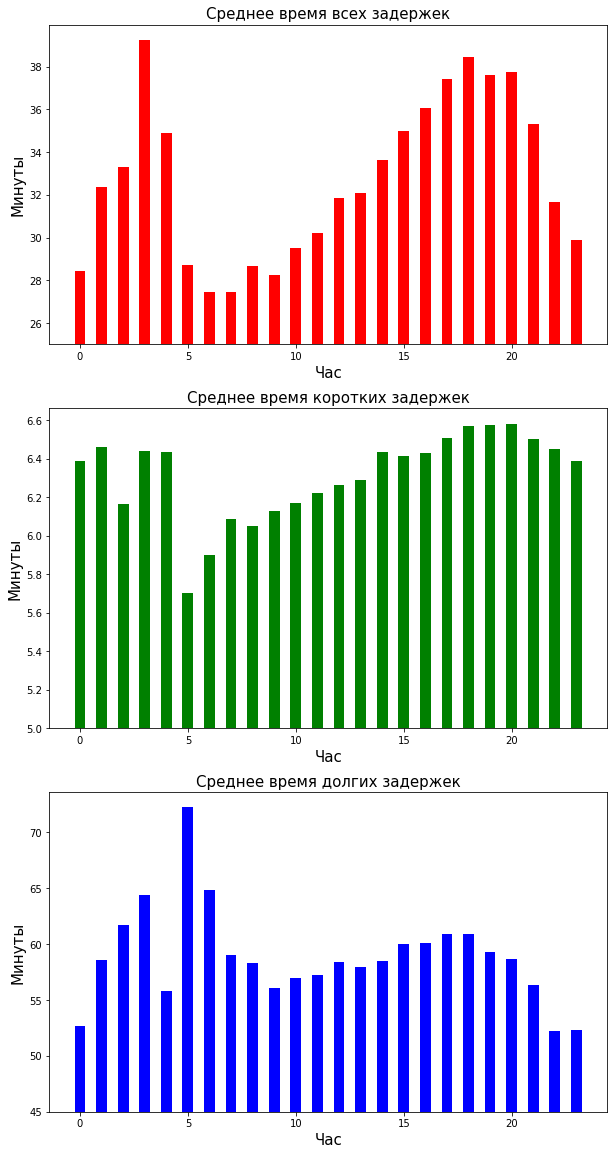

In [55]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 20))
width = 0.5 
ax1.bar(range(0,24), df_delay[["SCHEDULED_DEPARTURE_HOUR", 'ARRIVAL_DELAY']].astype(int).groupby(by="SCHEDULED_DEPARTURE_HOUR").agg(['mean']).ARRIVAL_DELAY['mean']-25, width, color='r', bottom = 25)


ax1.set_ylabel('Минуты', fontsize=15)
ax1.set_xlabel('Час', fontsize=15)
ax1.set_title('Среднее время всех задержек', fontsize=15)
ax2.bar(range(0,24), df_delay_small[["SCHEDULED_DEPARTURE_HOUR", 'ARRIVAL_DELAY']].astype(int).groupby(by="SCHEDULED_DEPARTURE_HOUR").agg(['mean']).ARRIVAL_DELAY['mean']-5, width, color='green', bottom = 5)


ax2.set_ylabel('Минуты', fontsize=15)
ax2.set_xlabel('Час', fontsize=15)
ax2.set_title('Среднее время коротких задержек', fontsize=15)

ax3.bar(range(0,24), df_delay_big[["SCHEDULED_DEPARTURE_HOUR", 'ARRIVAL_DELAY']].astype(int).groupby(by="SCHEDULED_DEPARTURE_HOUR").agg(['mean']).ARRIVAL_DELAY['mean']-45, width, color='b', bottom = 45)


ax3.set_ylabel('Минуты', fontsize=15)
ax3.set_xlabel('Час', fontsize=15)
ax3.set_title('Среднее время долгих задержек', fontsize=15)


plt.show()

Видно, что самое большое время долгих задержек - 6 утра, это связано с тем, что в аэропортах из-за меньшего кол-ва рейсов нет некоторых квал-рабочих и тп, чтобы решить некоторые типв редких проблем и неисправностей.
С 5 до 13 из-за меньшей загруженности короткие задержки меньше, тк нету таких видов задержки, как очередь на ВПП, чуть позже подъехавший заправщик и тп.
Общее среднее время задержки, ожидаемо, самое низкое рано утром, и возрастаетпо мере увеличения нагруженности, ночью большое из-за невозможности быстрого устранения серьезных неисправностией.